In [129]:
#import numpy as np
import pandas as pd #for reading csv files
#import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [130]:
path = './Datasets/'
fileName = 'diabetes.csv'
fullPath = path+fileName

In [131]:
print (fullPath)

./Datasets/diabetes.csv


In [132]:
#reading the file
features = pd.read_csv(fullPath)

In [136]:
#displaying all read fields
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
#All rows and columns except last one
x = features.iloc[:, :-1].values

#All rows and 5th column only
y = features.iloc[:, 5].values

In [141]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [142]:
print(y)

[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1  0.  19.4 24.2 24.4 33.7 34.7 23.
 37.7 46.8 40.5 41.5  0.  32.9 25.  25.4 32.8 29.  32.5 42.7 19.6 28.9
 32.9 28.6 43.4 35.1 32.  24.7 32.6 37.7 43.2 25.  22.4  0.  29.3 24.6
 48.8 32.4 36.6 38.5 37.1 26.5 19.1 32.  46.7 23.8 24.7 33.9 31.6 20.4
 28.7 49.7 39.  26.1 22.5 26.6 39.6 28.7 22.4 29.5 34.3 37.4 33.3 34.
 31.2 34.  30.5 31.2 34.  33.7 28.2 23.2 53.2 34.2 33.6 26.8 33.3 55.
 42.9 33.3 34.5 27.9 29.7 33.3 34.5 38.3 21.1 33.8 30.8 28.7 31.2 36.9
 21.1 39.5 32.5 32.4 32.8  0.  32.8 30.5 33.7 27.3 37.4 21.9 34.3 40.6
 47.9 50.  24.6 25.2 29.  40.9 29.7 37.2 44.2 29.7 31.6 29.9 32.5 29.6
 31.9 28.4 30.8 35.4 28.9 43.5 29.7 32.7 31.2 67.1 45.  39.1 23.2 34.9
 27.7 26.8 27.6 35.9 30.1 32.  27.9 31.6 22.6 33.1 30.4 52.3 24.4 39.4
 24.3 22.

<AxesSubplot:>

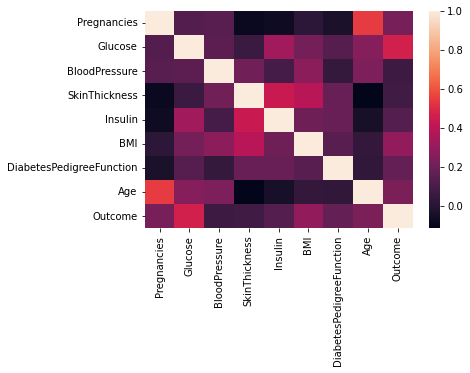

In [143]:
# Data Visualisation
# Building the correlation matrix
sns.heatmap(features.corr())

In [145]:
#encoding categorial data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#to convert the labels to numbers(not needed here. for e.g., A, B, C to 1,2,3)
labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:, 3])

ct = ColumnTransformer(["SkinThickness", OneHotEncoder(), [3]], remainder = 'passthrough')

#onehotencoder = OneHotEncoder(ColumnTransfomer = [3])
#x = onehotencoder.fit_transform(x).toarray()
#x = ct.fit_transform(x).toarray()

print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [146]:
#take all rows and colums from 2 onwards
x = x[:, 1:]

In [147]:
print (x[0])

[148.     72.     28.      0.     33.6     0.627  50.   ]


In [148]:
# splliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [149]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [150]:
#predicting the test set results
y_pred = regressor.predict(x_test)
print(y_pred)

[ 4.29000000e+01  3.36000000e+01  3.40000000e+01  2.58000000e+01
  2.46000000e+01  2.66000000e+01  3.42000000e+01  3.33000000e+01
  2.77000000e+01  3.77000000e+01  3.16000000e+01  4.36000000e+01
  2.49000000e+01  2.85000000e+01  3.20000000e+01  2.73000000e+01
  3.27000000e+01  2.30000000e+01  2.80000000e+01  3.40000000e+01
  3.85000000e+01  4.29000000e+01  2.89000000e+01  3.44000000e+01
  2.32000000e+01  3.58000000e+01  1.84000000e+01  4.06000000e+01
  2.50000000e+01  2.60000000e+01  2.60000000e+01  4.06000000e+01
  2.93000000e+01  3.62000000e+01  2.23000000e+01  3.29000000e+01
  2.83000000e+01  2.52000000e+01  3.55000000e+01  3.40000000e+01
  3.49000000e+01  4.27000000e+01  2.69000000e+01  3.49000000e+01
  3.05000000e+01 -3.91737617e-14  2.52000000e+01  2.64000000e+01
  3.48000000e+01  3.23000000e+01  2.70000000e+01  3.25000000e+01
  4.18000000e+01  3.20000000e+01  3.99000000e+01  2.47000000e+01
  2.66000000e+01  5.29000000e+01  2.89000000e+01 -2.73724358e-14
  3.76000000e+01  3.49000

In [151]:
#calculating the coefficients
print(regressor.coef_)

[ 3.94233645e-17 -1.52655666e-16 -7.37257477e-17 -2.77555756e-17
  1.00000000e+00  7.56847655e-16 -1.22731686e-16]


In [152]:
#calculating the intercept
print(regressor.intercept_)

-2.842170943040401e-14


In [153]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0